# Unsupervied Learning with KMeans algorithm

In [ ]:
Bài toán đặt ra là dự đoán Country dựa trên các yếu tố cho trước.
Khi đó bài toán cần làm là gom nhóm dữ liệu dựa vào các đặt trưng cho trước.
Thuật toán sử dụng cho bài toán là KMeans algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Country-data.csv')

In [4]:
num_rows,num_cols=df.shape
print('Dữ liệu bao gồm: {} dòng và {} cột'.format(num_rows,num_cols))

Dữ liệu bao gồm: 167 dòng và 10 cột


In [5]:
df.shape

(167, 10)

In [7]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
col_dtypes=df.dtypes
print(col_dtypes)

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [10]:
def open_object_dtype(s):
    df=pd.Series(s)
    a=df.apply(lambda x : type(x)).unique()
    dtypes = set(a)
    return dtypes

In [11]:
objects_key=(df.loc[:, df.dtypes == object]).keys()
print("numer of object columns:",len(objects_key))
for key in objects_key:
    print("types of ",key," is ",open_object_dtype(df[key]))

numer of object columns: 1
types of  country  is  {<class 'str'>}


In [12]:
countries = np.array(df['country'])

In [13]:
print("Shape of the dataset: ", df.shape)
print("_______________________________________")
print("Number of null values: ")
print(df.isnull().sum().sort_values(ascending=False))
print("_______________________________________")
print("Number of unique values: ")
print(df.nunique().sort_values(ascending=False))

Shape of the dataset:  (167, 10)
_______________________________________
Number of null values: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
_______________________________________
Number of unique values: 
country       167
gdpp          157
income        156
inflation     156
imports       151
exports       147
health        147
child_mort    139
total_fer     138
life_expec    127
dtype: int64


In [14]:
df = df.drop('country', axis=1)

## EDA

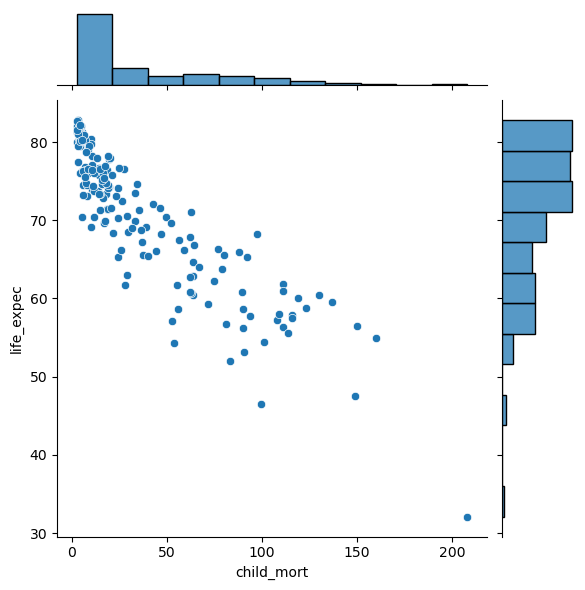

In [49]:
sns.jointplot(data=df, x=df['child_mort'], y=df['life_expec'])
plt.show()

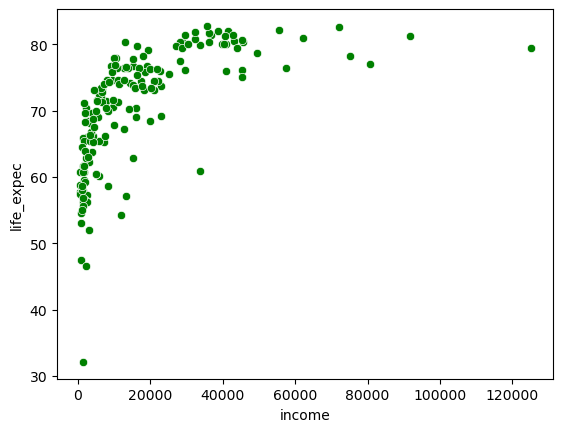

In [50]:
sns.scatterplot(data=df, x=df['income'], y=df['life_expec'], color='green')
plt.show()

In [59]:
np.array(df)

array([[90.2, 10.0, 7.58, ..., 553, 0, 'Afghanistan'],
       [16.6, 28.0, 6.55, ..., 4090, 3, 'Albania'],
       [27.3, 38.4, 4.17, ..., 4460, 1, 'Algeria'],
       ...,
       [23.3, 72.0, 6.84, ..., 1310, 3, 'Vietnam'],
       [56.3, 30.0, 5.18, ..., 1310, 0, 'Yemen'],
       [83.1, 37.0, 5.89, ..., 1460, 0, 'Zambia']], dtype=object)

### Preprocessing our features

In [20]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(np.array(df))

In [21]:
X[:3]

array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ,
        -0.31234747,  0.64786643, -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447,
         0.78927429,  0.67042323, -0.0384044 , -0.46537561]])

## creating model

In [22]:
base_model = KMeans(n_clusters=3)
base_model.fit(X)

KMeans(n_clusters=3)

In [23]:
base_model.predict(X)

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [24]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


C:\Users\LAP12988-local\AppData\Local\Temp\ipykernel_32\304586519.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),data=df)


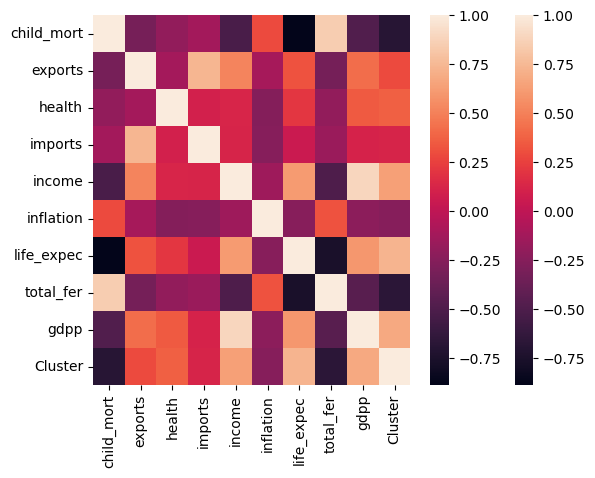

In [48]:
sns.heatmap(df.corr(),data=df)
plt.show()

## test k mean from 2 to 20

In [25]:
ks = 20
ssds = []
for i in range(2, ks):
    model = KMeans(n_clusters=i)
    model.fit(X)
    ssds.append(model.inertia_)

In [26]:
ssds

[1050.2145582853304,
 831.4244352086873,
 700.5205369722204,
 620.2564324973125,
 550.4475856323835,
 518.2395535977671,
 459.60896114509796,
 424.9676843633694,
 394.44958534096895,
 380.0800027292746,
 355.96958747324356,
 341.1999699136859,
 319.7421150646794,
 303.9921958311349,
 288.18672347989394,
 279.793131165856,
 263.78249457937306,
 252.23576762013994]

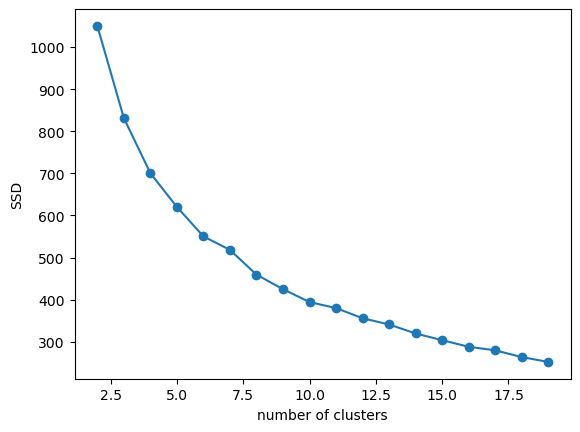

In [56]:
plt.plot(range(2, 20), ssds, 'o-')
plt.xlabel('number of clusters')
plt.ylabel('SSD')
plt.show()

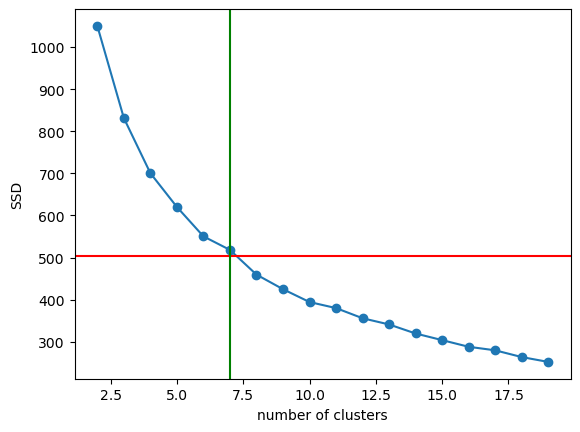

In [55]:
plt.plot(range(2, 20), ssds, 'o-')
plt.axhline(504, color='r')
plt.axvline(7, color='g')
plt.xlabel('number of clusters')
plt.ylabel('SSD')
plt.show()

In [29]:
ssd_distances = []
for i in range(0, len(ssds)):
    if i == len(ssds) - 1:
        break
    ssd_distances.append(ssds[i+1] - ssds[i])

In [30]:
ssd_distances

[-218.7901230766431,
 -130.90389823646694,
 -80.26410447490787,
 -69.80884686492902,
 -32.208032034616394,
 -58.630592452669134,
 -34.64127678172855,
 -30.518099022400463,
 -14.36958261169434,
 -24.110415256031047,
 -14.769617559557673,
 -21.45785484900648,
 -15.749919233544517,
 -15.805472351240951,
 -8.39359231403796,
 -16.010636586482917,
 -11.546726959233126]

## Draw elbow plot for optimal K

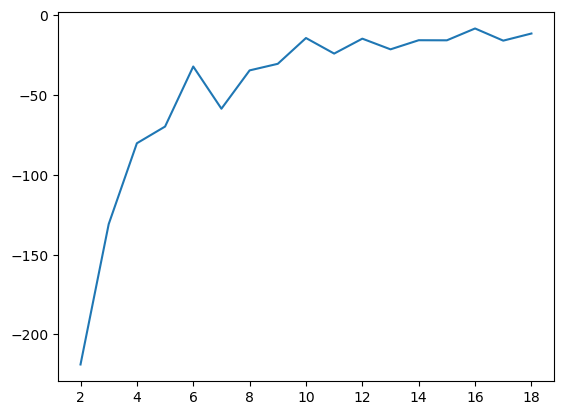

In [54]:
plt.plot(range(2, 19), ssd_distances)
plt.show()

## Choose k = 6

In [32]:
best_cluster_number = 6
final_model = KMeans(n_clusters=best_cluster_number)
final_model.fit(X)

KMeans(n_clusters=6)

In [33]:
final_model.predict(X)

array([0, 3, 1, 0, 3, 1, 1, 5, 5, 1, 3, 3, 1, 3, 3, 5, 3, 0, 3, 1, 3, 0,
       1, 5, 3, 0, 0, 3, 0, 5, 3, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 3, 5, 3,
       5, 1, 1, 1, 3, 0, 0, 3, 3, 5, 5, 1, 0, 3, 5, 0, 5, 3, 1, 0, 0, 3,
       0, 3, 5, 1, 1, 1, 1, 5, 5, 5, 1, 5, 3, 1, 0, 0, 5, 3, 0, 3, 3, 0,
       0, 1, 3, 2, 3, 0, 0, 3, 3, 0, 2, 0, 3, 3, 3, 1, 3, 1, 0, 1, 0, 1,
       5, 5, 0, 4, 5, 1, 0, 3, 3, 1, 1, 3, 5, 5, 1, 1, 0, 3, 1, 0, 3, 3,
       0, 2, 3, 3, 3, 0, 3, 5, 1, 3, 0, 3, 5, 5, 1, 0, 3, 0, 0, 1, 3, 1,
       3, 0, 3, 5, 5, 5, 1, 1, 3, 1, 3, 0, 0])

In [34]:
df['Cluster'] = final_model.predict(X)
df['Country'] = countries

In [35]:
df['Country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: Country, Length: 167, dtype: object

In [36]:
df['Cluster']

0      0
1      3
2      1
3      0
4      3
      ..
162    3
163    1
164    3
165    0
166    0
Name: Cluster, Length: 167, dtype: int32

In [40]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Country
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Afghanistan
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,Albania
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,Algeria
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Angola
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,Antigua and Barbuda


## Additional Plot

C:\Users\LAP12988-local\AppData\Local\Temp\ipykernel_32\342116037.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\LAP12988-local\AppData\Local\Temp\ipykernel_32\342116037.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 3], X[:, 4], c= final_model.predict(X)

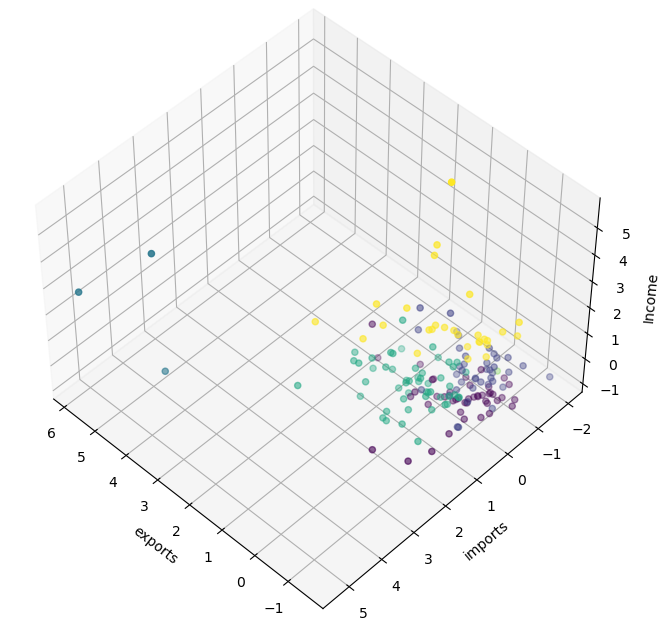

In [53]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('exports')
ax.set_ylabel('imports')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 3], X[:, 4], c= final_model.predict(X).astype(np.float))
plt.show()